In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nb_df = pd.read_csv("data/42mer_k14/42mer_k14_nb_final_complexity.tsv", sep="\t")
probe_df = pd.read_csv("data/42mer_k14/42mer_k14_probe_final_complexity.tsv", sep="\t")
implied_df = pd.read_csv("data/42mer_k14/42mer_k14_implied_final_complexity.tsv", sep="\t")

In [3]:
barcode_type_ls = []
for i in range(len(nb_df)):
    barcode_type_ls.append("NANOBODY")
nb_df = nb_df.assign(BARCODE_TYPE=barcode_type_ls)

In [4]:
barcode_type_ls = []
for i in range(len(probe_df)):
    barcode_type_ls.append("ISH_PROBE")
probe_df = probe_df.assign(BARCODE_TYPE=barcode_type_ls)

In [5]:
barcode_type_ls = []
for i in range(len(implied_df)):
    barcode_type_ls.append("IMPLIED")
implied_df = implied_df.assign(BARCODE_TYPE=barcode_type_ls)

In [6]:
all_df = pd.concat([nb_df, probe_df, implied_df], ignore_index=True)

In [7]:
all_df

,BARCODE_ID,BARCODE_SEQ,COMPLEXITY,BARCODE_TYPE
0,nb-seq1869996,GCTCCGAGTACAATGCTCCGAGTAGTATGCTCCGAGTAGCAT,0.025029,NANOBODY
1,nb-seq1346423,TCTAGGACAATCGCTCTAGGAGTATCGCTCTAGGAGCATCGC,0.047809,NANOBODY
2,nb-seq519434,TACGGCACCGATTGTACGGCACCAATTGTACGGCACGTATTG,0.044414,NANOBODY
3,nb-seq5523087,ACCAACAGGTTTGCACGTACAGGTTTGCACGCACAGGTTTGC,0.021453,NANOBODY
4,nb-seq657033,GCGATTGACGCCTAGCAATTGACGCCTAGGTATTGACGCCTA,0.033229,NANOBODY
...,...,...,...,...
1577515,nb-seq1206525_probe-seq3842819,CCTGAGTCGGACTACCTGAGTGCTACGGATGCCATGCTACGG,0.218838,IMPLIED
1577516,nb-seq1206525_probe-seq2453994,ATATTAGCGCGTCAATATCAGGCTACGGATGCCATGCTACGG,0.519641,IMPLIED
1577517,nb-seq1206525_probe-seq1726065,CTCTGAGGACATTGCTCTGAGGCTACGGATGCCATGCTACGG,0.226944,IMPLIED
1577518,nb-seq1206525_probe-seq569455,TCGCAATCGGTAGCTCGCAATGCTACGGATGCCATGCTACGG,0.208237,IMPLIED


Text(0, 0.5, 'complexity')

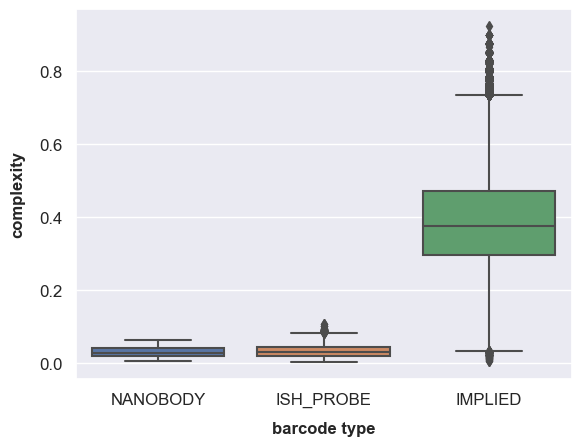

In [12]:
sns.set()
sns.set(font_scale = 1.1)
def label_medians(dataframe, boxplot, x, y):
    medians = round(dataframe.groupby([x])[y].median(), 2)
    vertical_offset = dataframe[y].median() * 0.5
    for xtick in boxplot.get_xticks():
        boxplot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], horizontalalignment='center',size='x-small',color='w',weight='semibold')
        
# print("\n")
bc_boxplot = sns.boxplot(data=all_df, x="BARCODE_TYPE", y="COMPLEXITY", whis=1.5)
bc_boxplot.set_xlabel('barcode type', fontdict={'size': 12, "weight": "bold"}, labelpad=10)
bc_boxplot.set_ylabel('complexity', fontdict={'size': 12, "weight": "bold"}, labelpad=10)
# label_medians(all_df, bc_boxplot, "BARCODE_TYPE", "COMPLEXITY")

# 0.38
# 0.03
# 0.03

In [24]:
all_df[all_df["COMPLEXITY"] < 0.01]

,BARCODE_ID,BARCODE_SEQ,COMPLEXITY,BARCODE_TYPE
8,nb-seq4742588,AACGTAGCTCGTACAACGTAGCTCGTAGTACGTAGCTCGTAG,0.003354,NANOBODY
14,nb-seq4164925,ACCTTAGGTACGCAACCTTAGGTACGGTACCTTAGGTACGGC,0.008102,NANOBODY
15,nb-seq865380,GATTAGATGCGCCTAATTAGATGCGCCCTATTAGATGCGCCC,0.008231,NANOBODY
26,nb-seq4411327,GACCGTAGTAGTCTAACCGTAGTAGTCCTACCGTAGTAGTCC,0.006329,NANOBODY
41,nb-seq4826295,TAACGCGTCAGTTACAACGCGTCAGTTAGTACGCGTCAGTTA,0.008369,NANOBODY
...,...,...,...,...
1063308,nb-seq2260821_probe-seq2011379,AACGTGCATCGTGCAACGTGCAACGTCATGCGTGCAACGTCA,0.009246,IMPLIED
1130873,nb-seq3688067_probe-seq1972195,TGCGCATCGCTAAGTGCGCATCGCTAAGTGCACTGCGCTAAG,0.004792,IMPLIED
1306738,nb-seq987170_probe-seq2261299,AGACGTCATCGTCGAGACGTCATCGTCGAGATGCCATCGTCG,0.003865,IMPLIED
1307783,nb-seq987170_probe-seq1448479,AGCATCGATCGTCGAGCATCGATCGTCGAGATGCCATCGTCG,0.006310,IMPLIED
